#Data

In [1]:
! wget https://raw.githubusercontent.com/Eyad-Alqaysi/Supervised-Machine-Learning-Regression-and-Classification/main/Training/regression/kc_house_data.csv

--2023-02-16 21:08:09--  https://raw.githubusercontent.com/Eyad-Alqaysi/Supervised-Machine-Learning-Regression-and-Classification/main/Training/regression/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv.3’

kc_house_data.csv.3 100%[===================>]   2.40M  --.-KB/s    in 0.02s   

2023-02-16 21:08:09 (158 MB/s) - ‘kc_house_data.csv.3’ saved [2515206/2515206]



#Linear Regression


In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('kc_house_data.csv')
print(df.head(),'\n\n\n')
df.info()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [4]:
X = df.drop(['id','date','price'],axis=1)#(Features)
y = df['price']#(Target)
print(X.shape, y.shape)

(21613, 18) (21613,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
print('X_train.shape:',X_train.shape,'\nY_train.shape:',y_train.shape)
print('\nX_test.shape:',X_test.shape,'\nY_test.shape:',y_test.shape)

X_train.shape: (17290, 18) 
Y_train.shape: (17290,)

X_test.shape: (4323, 18) 
Y_test.shape: (4323,)


In [6]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [7]:
Yhat = model.predict(X_test)

Model intercept:  7696209.822014969
Model coefficients:  [-3.18545865e+04  3.68972027e+04  1.05764345e+02  1.30748881e-01
  7.06848364e+03  5.98906038e+05  5.22628166e+04  2.58932186e+04
  9.79151652e+04  6.98638411e+01  3.59005041e+01 -2.57954488e+03
  1.79098845e+01 -6.13663438e+02  6.01965346e+05 -2.31121967e+05
  2.45431327e+01 -3.59167100e-01]
R square: 69.25970326987083


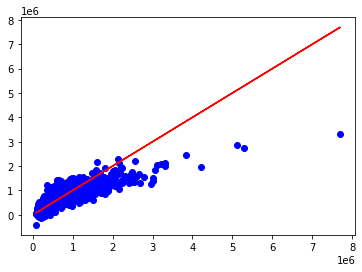

In [8]:
plt.scatter(y_test,Yhat, color = 'b')
plt.plot(y_test,y_test, 'r-')
print('Model intercept: ', model.intercept_)
print('Model coefficients: ', model.coef_)
print('R square:', r2_score(y_test,Yhat)*100)

#Polynomial Regression


In [9]:
model_p = PolynomialFeatures()
model = linear_model.LinearRegression()
model.fit(model_p.fit_transform(X_train),y_train)

LinearRegression()

In [10]:
Yhat = model.predict(model_p.fit_transform(X_test))

R square: 83.10374413319809


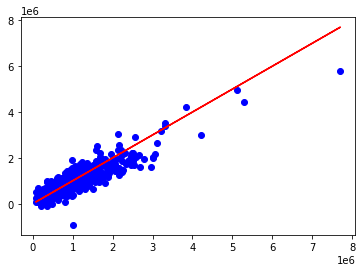

In [11]:
plt.scatter(y_test,Yhat, color = 'b')
plt.plot(y_test,y_test, 'r-')
print('R square:', r2_score(y_test,Yhat)*100)